# DIGGS Python Tutorial 1

Author: Xin Peng, PhD, PE

Email: xin_peng@outlook.com

***

## Outline

1. Load the DIGGS Example File
2. Read Root Properties/Children under "DIGGS" Element
3. Define Namespaces in Python
4. Retrieve Bolehole Information
5. Retrieve Sampling Activity Information
6. Retrieve Measurement Information
7. Plot Measurement Data

### 1. Load the DIGGS Example File

A DIGGS file named "**BH with Atterberg Limits.xml**" is located in the same folder of this Jupyter Notebook script.

In [1]:
# import an XML API from a standard Python Liberary to read xml file:
import xml.etree.ElementTree as ET

# Parse DIGGS file using the Python XML API:
tree = ET.parse('DIGGS Example File 1.xml')
root = tree.getroot()

***

### 2. Read Root Properties/Children under "DIGGS" Element

In [2]:
# Use "for" loop to print the tags of all the root childen/objects:

for child in root:
    print(child.tag)

{http://diggsml.org/schemas/2.5.a}documentInformation
{http://diggsml.org/schemas/2.5.a}project
{http://diggsml.org/schemas/2.5.a}samplingFeature
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}samplingActivity
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}sample
{http://diggsml.org/schemas/2.5.a}measurement
{http://diggsml.org/schemas/2.5.a}measurement
{http://diggsml.org/schemas/2.5.a}measurement
{http://diggsml.org/schemas/2.5

***

### 3. Define XML Namespaces in Python

An XML instance may contain element or attribute names from more than one XML vocabulary.
XML namespaces are used for providing uniquely named elements and attributes in an XML document.

In [3]:
ns = {'xmlns': 'http://diggsml.org/schemas/2.5.a', 'gml': 'http://www.opengis.net/gml/3.2', 'xlink': 'http://www.w3.org/1999/xlink'}

***

### 4. Retrieve Bolehole Information in "SamplingFeature"

In [4]:
# Use "for" loop to find and print names of all the boreholes:

for borehole in root.findall('.//xmlns:Borehole', ns):
    borehole_name = borehole.find('gml:name', ns).text
    print(borehole_name)

B-01


As can be seen, we have one borehole called "**B-01**" in this demo DIGGS file.

***

### 5. Retrieve Sampling Activity Information

#### 5.1 Retrieve Sample Names in "SamplingActivity"

In [5]:
# Define a empty list to store all the sample IDs:

sample_ID_list = []

# Use "for" loop to find and append all the sample IDs to the predefined Sample ID list:

for sample in root.findall('.//xmlns:SamplingActivity', ns):
    sample_ID = sample.find('gml:name', ns).text
    sample_ID_list.append(sample_ID)

# Print the Sample ID list:
print(sample_ID_list)

['C-2', 'C-3', 'C-4', 'C-7', 'C-8', 'C-9', 'C-10']


As can be seen, we have 7 sampling activities named in this demo DIGGS file.

***

#### 5.2. Retrieve location of each Sampling Activity , i.e. top and bottom depths in Borehole

In [6]:
# Define two empty lists to store top and bottom depths of all the samples:

sample_depth_top = []
sample_depth_bottom = []

# Use "for" loop to find the depths values of all the samples:

for sample_depth in root.findall('.//xmlns:SamplingActivity', ns):
    sample_depth_value = sample_depth.find('.//gml:posList', ns).text
    # print(sample_depth_value)
    
# Split the depth information for each sample and convert them to float numbers:

    sample_depth_top.append(float(sample_depth_value.split(" ")[0]))
    sample_depth_bottom.append(float(sample_depth_value.split(" ")[1]))

# Print the Sample Top and Bottom Depths:

print(sample_depth_top)
print(sample_depth_bottom)
    

[2.0, 4.0, 6.0, 12.0, 14.0, 16.0, 18.0]
[4.0, 6.0, 8.0, 14.0, 16.0, 18.0, 20.0]


The first list includes alll the top depth values of all the sampling activities.<br> The second list includes alll the bottom depth values of all the sampling activities

***

### 6. Retrieve Measurement Information

#### 6.1 Retrieve Test names in all Measurements

In [7]:
# Use "for" loop to find and print all Test names:

for measurement in root.findall('.//xmlns:Test', ns):
    test_name = measurement.find('gml:name', ns).text
    print(test_name)

ATTERBERG
ATTERBERG
ATTERBERG
ATTERBERG
ATTERBERG


As can be seen, we have 5 measurments related to ATTERBERG tests in this demo DIGGS file.

***

#### 6.2 Retrieve the 1D location (i.e. depth) in the borehole for all Measurements (i.e. ATTERBERG)

In [8]:
# Define a empty list to store the depth location values for all Test measurements:

Atterberg_measurement_depth = []

# Use "for" loop to find and append the depth location values for all Test measurements to the predefined list:

for measurement in root.findall('.//xmlns:Test', ns):
    measurement_depth_value = measurement.find('.//gml:posList', ns).text
    Atterberg_measurement_depth.append(float(measurement_depth_value))
print(Atterberg_measurement_depth)


[4.0, 6.0, 12.0, 14.0, 16.0]


***

#### 6.3 Retrieve corresponding test data values for all Measurements (i.e. ATTERBERG)

In [9]:
# Define two empty lists to store all LL and PL measurements:
liquid_limit_data = []
plastic_limit_data = []

# Split the ATTERBERG measurements and convert them to integers:
for measurement in root.findall('.//xmlns:Test', ns):
    Atterberg_values = measurement.find('.//xmlns:dataValues', ns).text
    # print(Atterberg_values)
    liquid_limit_data.append(int(Atterberg_values.split(" ")[0]))
    plastic_limit_data.append(int(Atterberg_values.split(" ")[1]))

# Print LL and PL measurements:    
print(liquid_limit_data)
print(plastic_limit_data)


[44, 16, 36, 51, 48]
[14, 14, 13, 17, 22]


***

### 7. Plot  Measurement Data

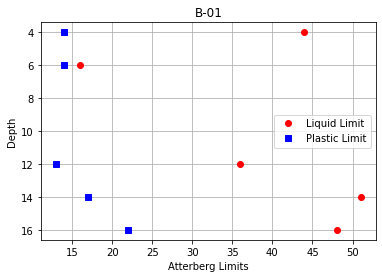

In [10]:
# Import a plotting module from a Python Liberary:
import matplotlib.pyplot as plt

# Plot Liquid Limit vs Depth with red circles:
plt.plot(liquid_limit_data, Atterberg_measurement_depth, 'ro', label="Liquid Limit")

# Plot Plastic Limit  vs Depth with blue squares:
plt.plot(plastic_limit_data, Atterberg_measurement_depth, 'bs', label="Plastic Limit")

# Style the plot:
plt.xlabel('Atterberg Limits')
plt.ylabel('Depth')
plt.grid(True)
plt.title(borehole_name)
plt.gca().invert_yaxis()
plt.legend(loc="center right")
plt.show()


***

License: Attribution-ShareAlike 4.0 International (CC BY-SA 4.0)
You are free to Share (copy and redistribute the material in any medium or format) and Adapt (remix, transform, and build upon the material for any purpose, even commercially), under the following terms: Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use. ShareAlike — If you remix, transform, or build upon the material, you must distribute your contributions under the same license as the original. More details [here](https://creativecommons.org/licenses/by-sa/4.0/).